 ## 1. Project Overview

### 1.1 Business Understanding

##### 1.1.1 Objective
- The goal is to predict whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company, in order to reduce revenue loss due to customer churn.
  
- This is a binary classification problem where the target variable is "churn" is True for customers who leave, False for those who stay.
  
##### 1.1.2 Business Context
- Customer churn is a critical issue for telecom companies like SyriaTel, as retaining existing customers is often more cost-effective than acquiring new ones. 
  
- Losing customers leads to lost revenue, reduced market share, and increased costs for marketing and customer acquisition. 
  
- By identifying customers at risk of churning, SyriaTel can implement targeted retention strategies, such as offering discounts, personalized plans, or improved customer service, to keep these customers.

##### 1.1.3 Stakeholders
The primary audience is SyriaTel’s management and customer service team, who are interested in:
- Reducing financial losses caused by customer's churn.
- Understanding patterns that would likely indicate a customer is likely to leave.
- Prioritizing resources for retention efforts based on predictive insights.

##### 1.1.4 Key Business Questions
- Are there specific customer behaviors or account characteristics that predict churn?
- Can we build a reliable model to identify at-risk customers early enough to intervene?
- Which factors are most influential in driving churn, and how can the business address them?

##### 1.1.5 Success Metrics 
From a business perspective, success will be measured by:
- The ability to accurately predict churn, enabling proactive retention efforts.
- Reduction in churn rate after implementing strategies based on model insights.
- Cost savings from retaining customers compared to acquiring new ones.

##### 1.1.5 Expected Outcomes
By leveraging predictive modeling (using Logistic Regression and Decision Tree classifiers), SyriaTel can:
- Identify key predictors of churn (e.g., high customer service calls, expensive plans).
- Develop targeted retention programs to reduce churn rates.
- Optimize resource allocation by focusing on high-risk customers.

### 2. Data Understanding

##### 2.1 Objective
- Here we explore the dataset to understand its structure, content, and quality to assess its suitability for predicting customer churn for SyriaTel.

##### 2.2 Data Source:

- The dataset is sourced from: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data.



##### 2.3 Import Relevant Libraries and Load Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churn_data.shape

(3333, 21)

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### 2.4 Dataset Overview

- **Size**: The dataset contains 3,333 rows (customers) and 21 columns (features, including the target variable).
  
- **Target Variable**: `churn` which is `True` for customers who left, `False` for those who stayed.
  
- **Features**: The dataset includes a mix of numerical and categorical features related to customer demographics, account details, usage patterns, and interactions with customer service.

##### Feature Descriptions
The dataset includes the following columns, along with their data types and descriptions:

| **Feature**                  | **Data Type** | **Description**                                                                 |
|------------------------------|---------------|---------------------------------------------------------------------------------|
| `state`                      | Categorical   | U.S. state where the customer resides.                           |
| `account length`             | Numerical     | Number of days the customer has been with SyriaTel.                             |
| `area code`                  | Categorical   | Area code of the customer’s phone number (e.g., 415, 408).                      |
| `phone number`               | Categorical   | Customer’s phone number (unique identifier).                                    |
| `international plan`         | Categorical   | Whether the customer has an international plan (`yes`/`no`).                    |
| `voice mail plan`            | Categorical   | Whether the customer has a voice mail plan (`yes`/`no`).                        |
| `number vmail messages`      | Numerical     | Number of voice mail messages.                                                 |
| `total day minutes`          | Numerical     | Total minutes of calls during the day.                                          |
| `total day calls`            | Numerical     | Total number of calls during the day.                                          |
| `total day charge`           | Numerical     | Total charges for daytime calls.                                               |
| `total eve minutes`          | Numerical     | Total minutes of calls during the evening.                                      |
| `total eve calls`            | Numerical     | Total number of calls during the evening.                                      |
| `total eve charge`           | Numerical     | Total charges for evening calls.                                               |
| `total night minutes`        | Numerical     | Total minutes of calls during the night.                                       |
| `total night calls`          | Numerical     | Total number of calls during the night.                                        |
| `total night charge`         | Numerical     | Total charges for nighttime calls.                                             |
| `total intl minutes`         | Numerical     | Total minutes of international calls.                                          |
| `total intl calls`           | Numerical     | Total number of international calls.                                           |
| `total intl charge`          | Numerical     | Total charges for international calls.                                         |
| `customer service calls`      | Numerical     | Number of calls made to customer service.                                      |
| `churn`                      | Binary        | Target variable indicating whether the customer churned (`True`/`False`).       |


In [ ]:
churn_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
churn_data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [6]:
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
def transform_df(df):
    
    """
    Transforms yes and no values in certain columns of the df to 1s and 0s, respectively. 
    Returns the dataframe.
    """
    
    df['international plan'] = df['international plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
    df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

    return df


def plot_conf_matrix(y_true, y_pred):
    
    """
    Plots a prettier confusion matrix than matplotlib.
    """
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap=sns.color_palette('Blues_d'), fmt='0.5g', annot_kws={"size": 16})
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.ylim([0,2])
    plt.show()

In [12]:
features_to_use = ['account length', 'international plan', 'voice mail plan', 'number vmail messages',
                   'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
                   'customer service calls']
target = ['churn']

In [13]:
df_train_transformed = transform_df(df[features_to_use + target])
df_train_transformed.head()

/tmp/ipykernel_1617777/4125614760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['international plan'] = df['international plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
/tmp/ipykernel_1617777/4125614760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice mail plan'] = df['voice mail plan'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


,account length,international plan,voice mail plan,number vmail messages,total day charge,total eve charge,total night charge,total intl charge,customer service calls,churn
0,128,0,1,25,45.07,16.78,11.01,2.70,1,False
1,107,0,1,26,27.47,16.62,11.45,3.70,1,False
2,137,0,0,0,41.38,10.30,7.32,3.29,0,False
3,84,1,0,0,50.90,5.26,8.86,1.78,2,False
4,75,1,0,0,28.34,12.61,8.41,2.73,3,False


In [14]:
X = df_train_transformed[features_to_use]
y = df_train_transformed[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)
X_train.shape, X_test.shape

((2499, 9), (834, 9))

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled.values.ravel())
y_pred = lr.predict(X_test)

Train set evaluation:
Accuracy: 0.7079045837231057
Recall: 0.724508886810103
Precision: 0.7012222725215029
F1 Score: 0.7126754083275822
ROC AUC: 0.7079045837231057
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.69      0.70      2138
        True       0.70      0.72      0.71      2138

    accuracy                           0.71      4276
   macro avg       0.71      0.71      0.71      4276
weighted avg       0.71      0.71      0.71      4276

Confusion Matrix:
 [[1478  660]
 [ 589 1549]]


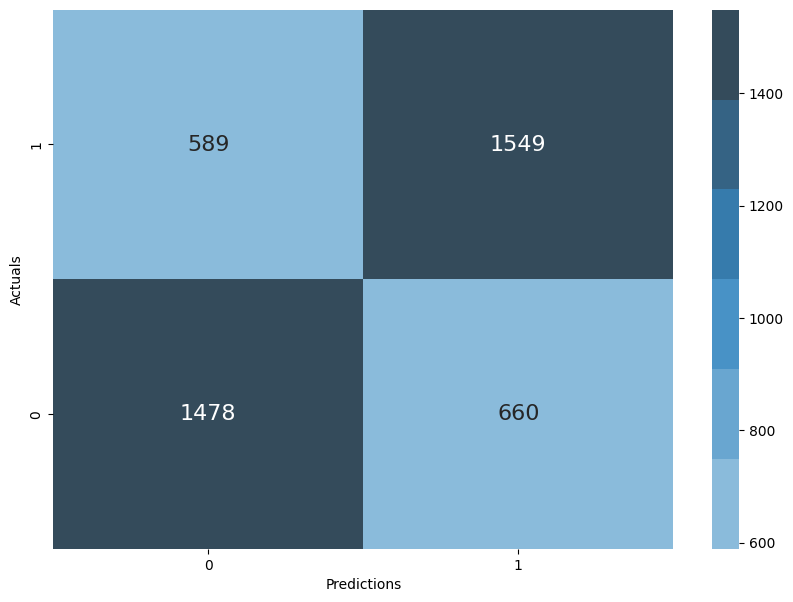

In [19]:
# evaluate the train set
y_train_pred = lr.predict(X_train_resampled)
print('Train set evaluation:')
print('Accuracy:', accuracy_score(y_train_resampled, y_train_pred))
print('Recall:', recall_score(y_train_resampled, y_train_pred))
print('Precision:', precision_score(y_train_resampled, y_train_pred))
print('F1 Score:', f1_score(y_train_resampled, y_train_pred))
print('ROC AUC:', roc_auc_score(y_train_resampled, y_train_pred))
print('Classification Report:\n', classification_report(y_train_resampled, y_train_pred))
print('Confusion Matrix:\n', confusion_matrix(y_train_resampled, y_train_pred))
plot_conf_matrix(y_train_resampled, y_train_pred)

Accuracy:  0.684652278177458
Recall:  0.7950819672131147
Precision:  0.28955223880597014
F1 Score:  0.424507658643326
ROC AUC:  0.7304061521458831
Classification Report: 
              precision    recall  f1-score   support

       False       0.95      0.67      0.78       712
        True       0.29      0.80      0.42       122

    accuracy                           0.68       834
   macro avg       0.62      0.73      0.60       834
weighted avg       0.85      0.68      0.73       834



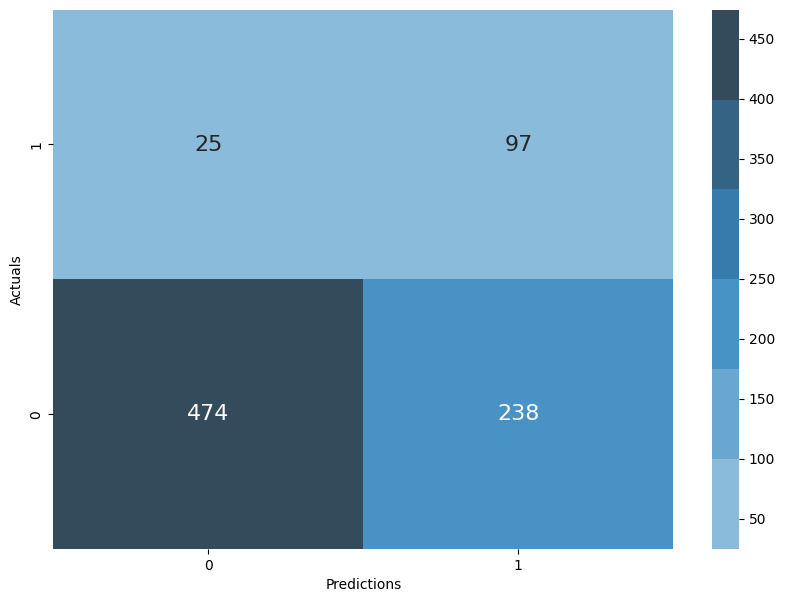

In [18]:
#evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred))
print('Classification Report: ')
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)